# Scaled Dot-Product Attention

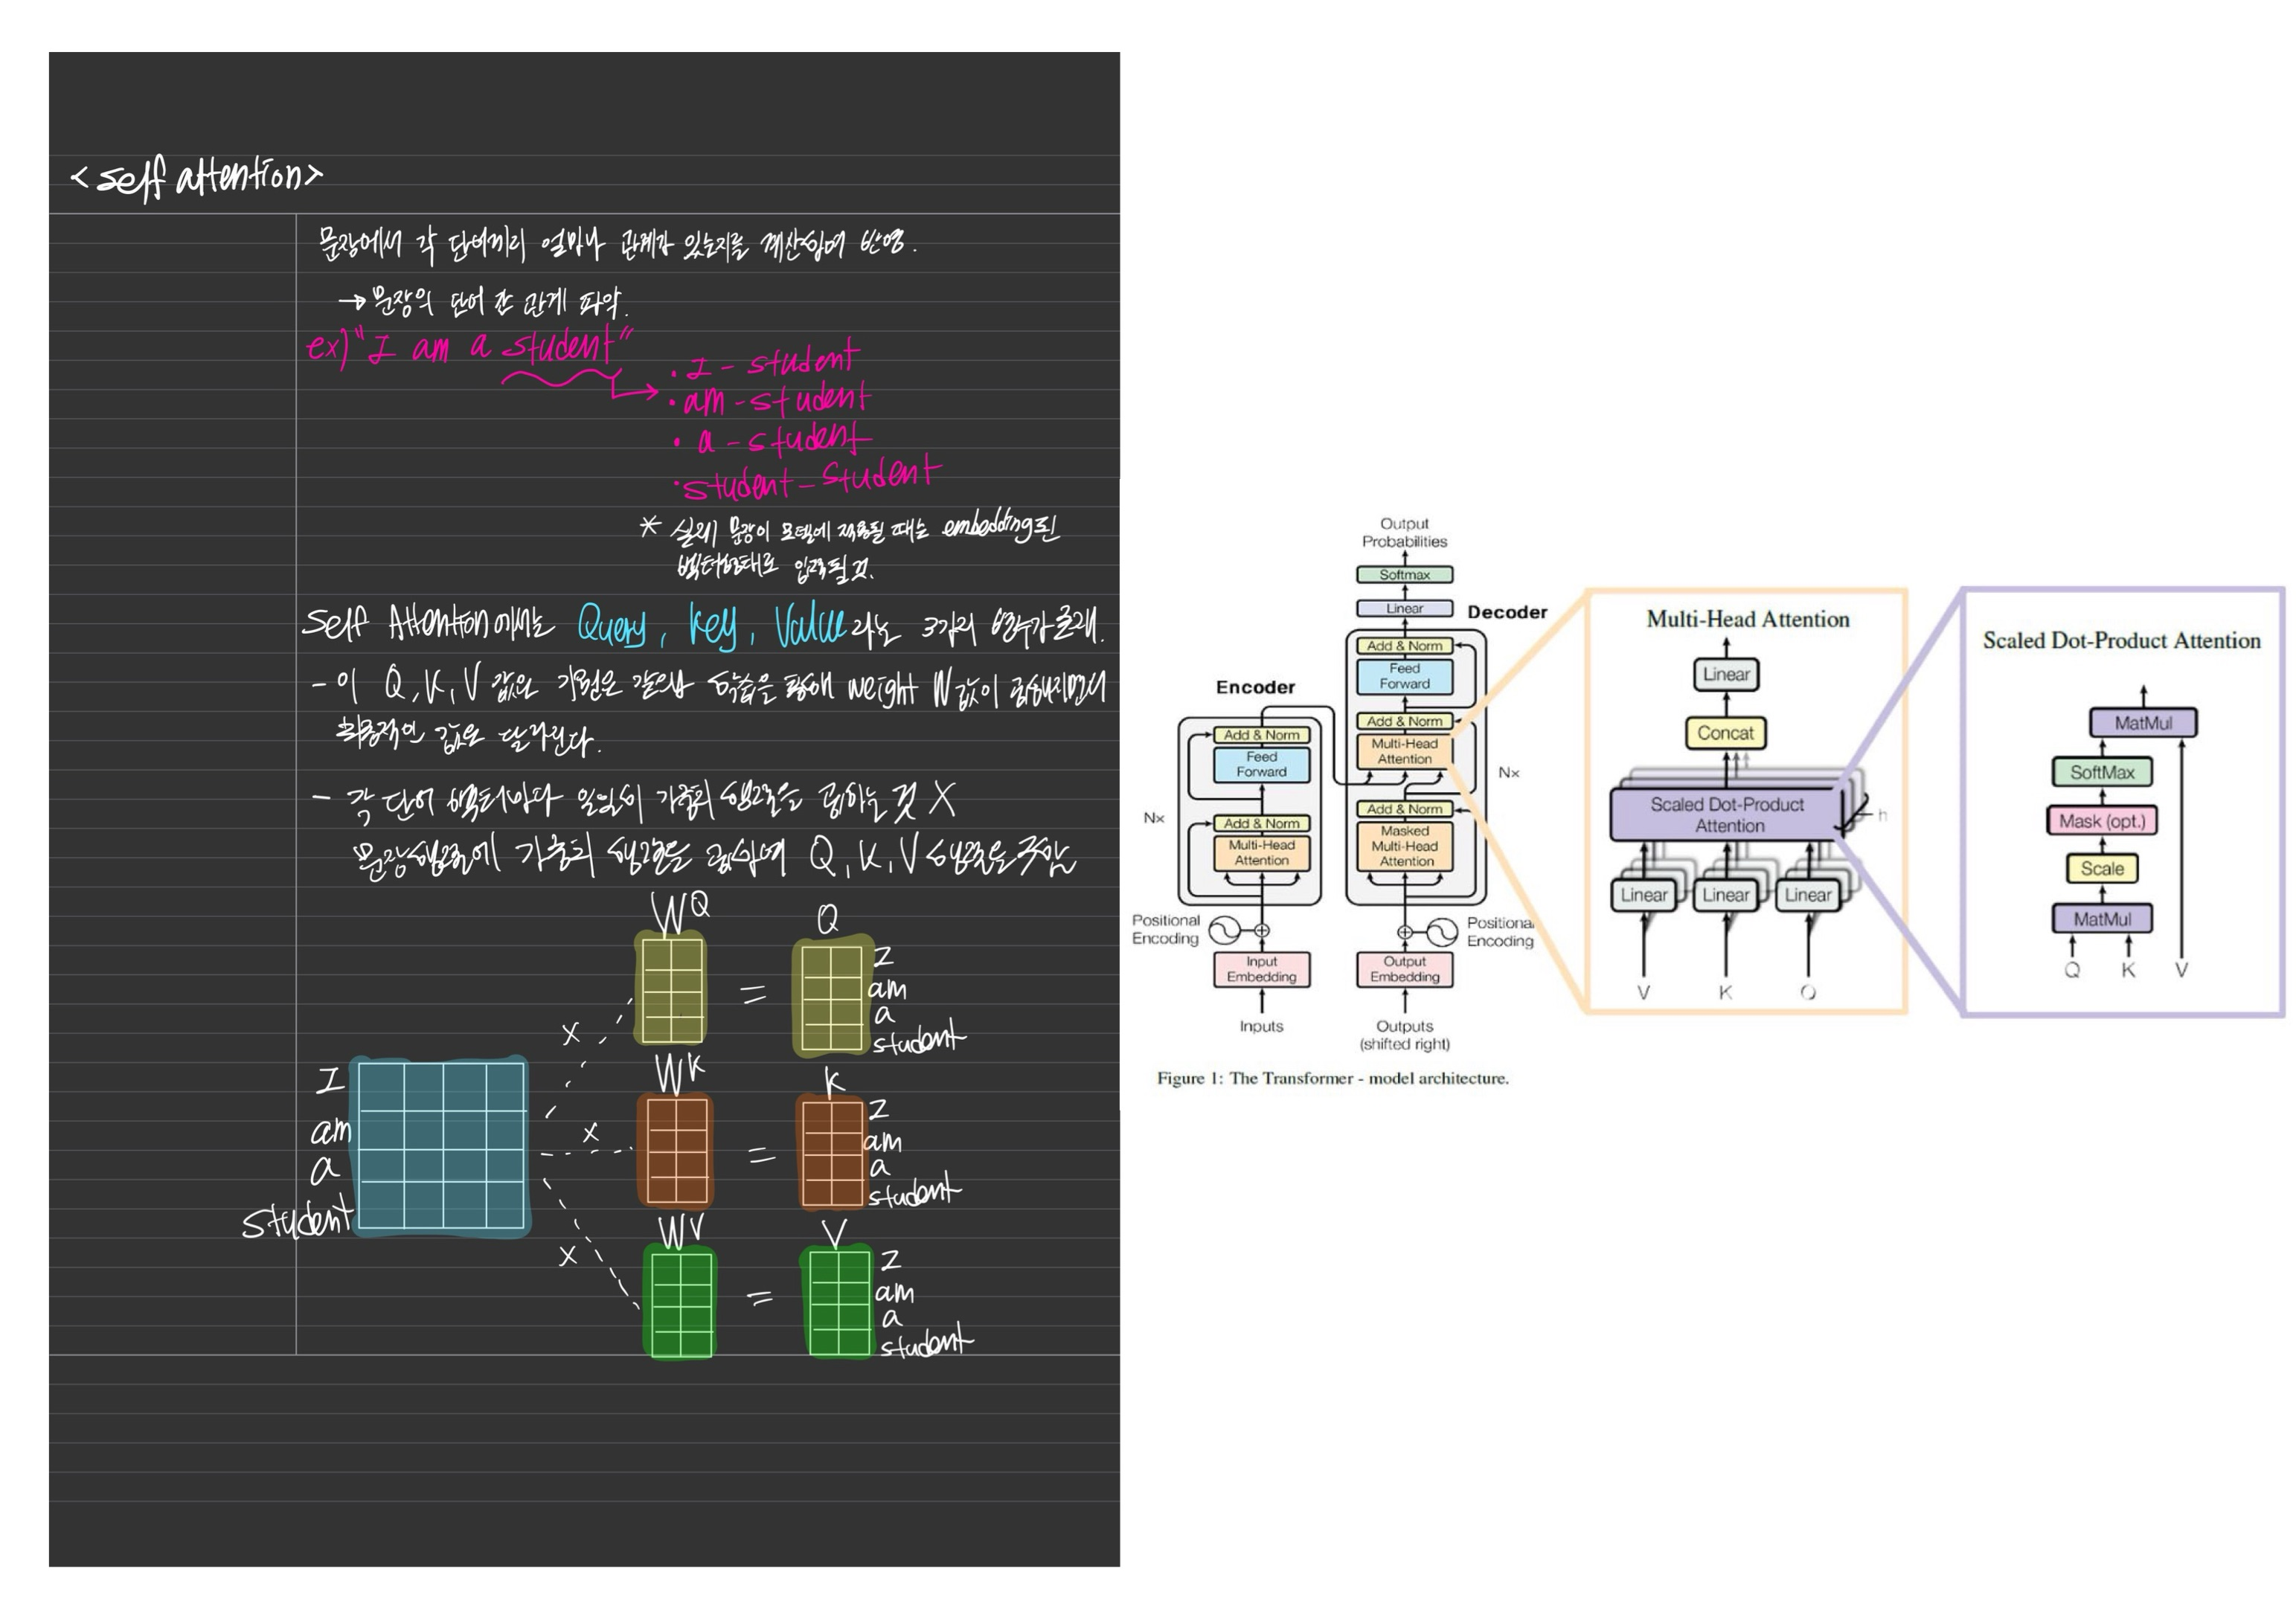

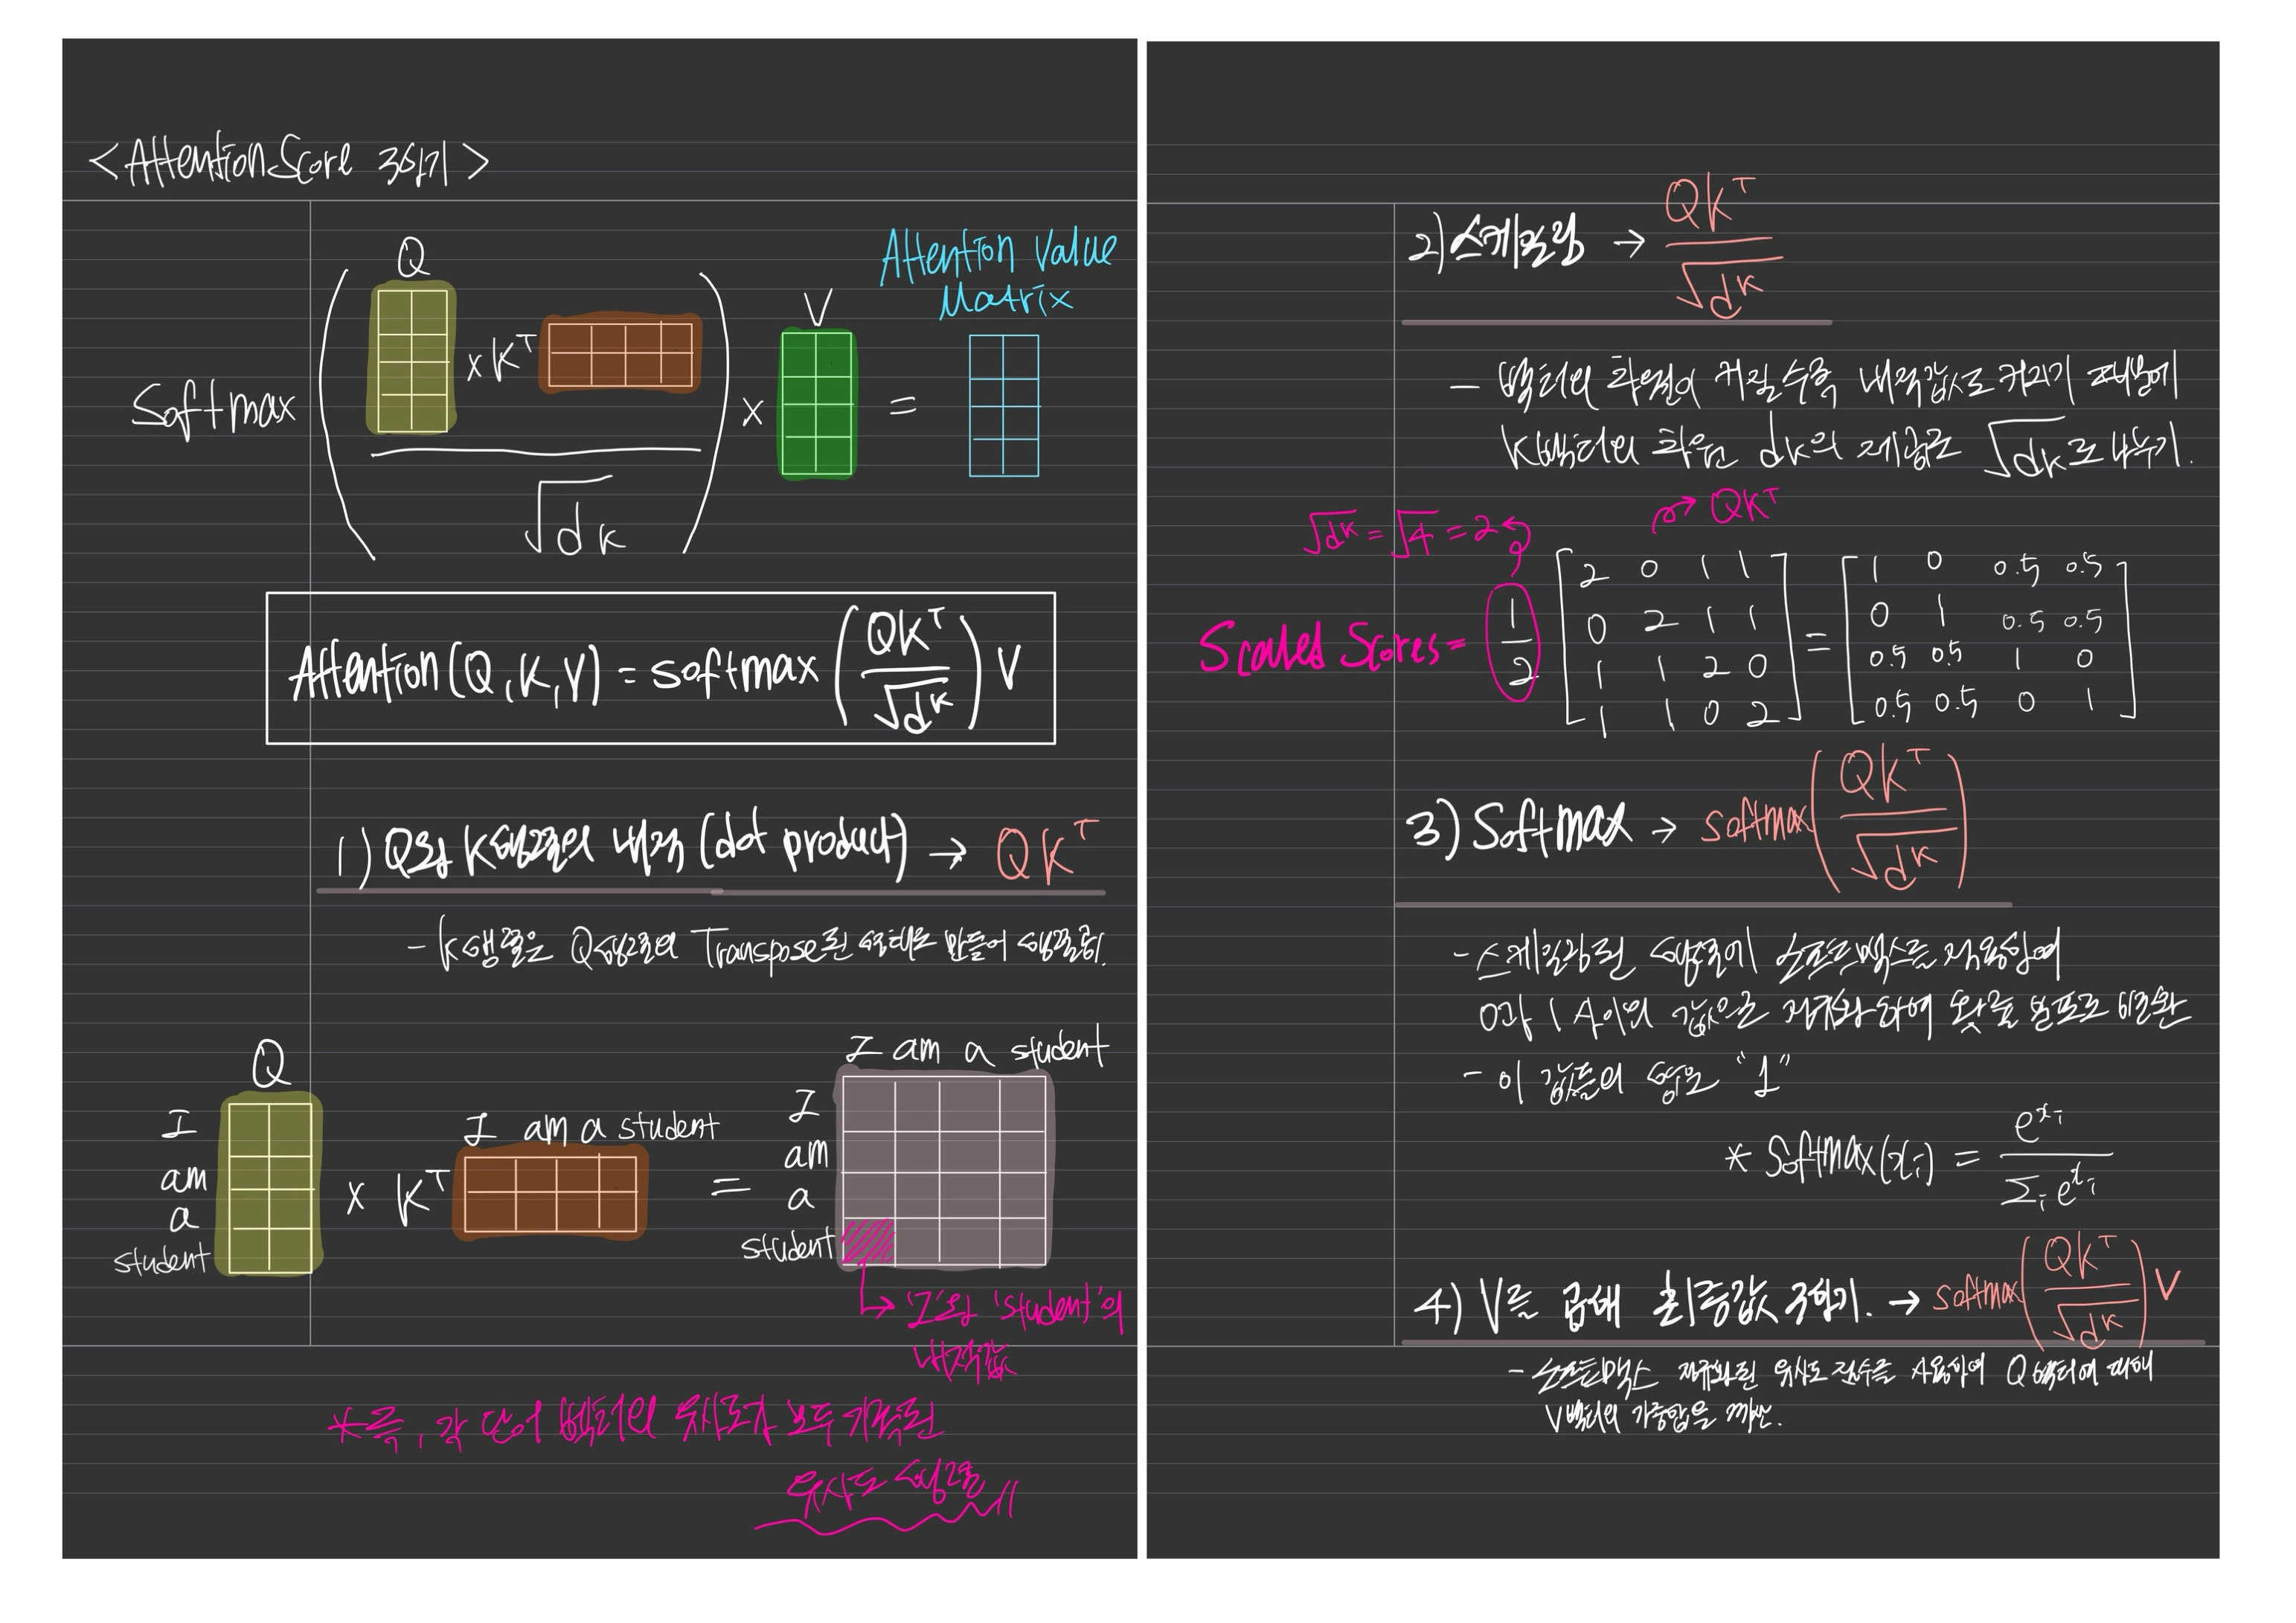

In [ ]:
import torch
import torch.nn.functional as F

# 임의의 데이터 생성
d_k = 64  # Key 벡터의 차원
batch_size = 2
seq_length = 10

# 임의의 Query, Key, Value 행렬 생성
Q = torch.rand(batch_size, seq_length, d_k)
K = torch.rand(batch_size, seq_length, d_k)
V = torch.rand(batch_size, seq_length, d_k)

### 1) Q, K 내적 계산

In [ ]:
scores = torch.matmul(Q, K.transpose(-2, -1))
print("Scores (QK^T):", scores)

Scores (QK^T): tensor([[[16.9964, 15.9282, 17.7995, 19.4051, 19.8829, 13.5755, 17.2254,
          16.6049, 18.3265, 16.2303],
         [17.1684, 14.1489, 15.7713, 16.3333, 17.7810, 13.5090, 15.1650,
          14.1701, 15.6898, 14.7164],
         [15.5745, 15.4201, 15.9185, 15.6611, 18.8684, 13.2820, 16.1355,
          14.3227, 16.2237, 14.3120],
         [19.1288, 17.8679, 17.7769, 18.8815, 21.2331, 15.3398, 17.5232,
          16.2321, 18.7701, 17.4711],
         [13.6958, 12.9751, 13.1636, 15.4337, 16.1250, 12.4361, 13.6466,
          14.2286, 14.5097, 12.7942],
         [15.2165, 15.1974, 17.0989, 17.0389, 18.3295, 13.1309, 15.2188,
          16.1147, 16.2850, 14.3899],
         [20.5288, 19.4544, 20.8241, 20.9227, 22.8314, 17.6811, 19.7825,
          19.3953, 20.3740, 18.1783],
         [15.0662, 15.2202, 15.4918, 16.1559, 18.0014, 13.8452, 15.0705,
          15.4611, 15.6094, 14.9620],
         [15.9998, 16.3065, 14.7888, 15.7302, 17.7636, 14.0457, 15.5675,
          15.1928, 14.58

### 2) 스케일링

In [ ]:
scaled_scores = scores / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
print("Scaled Scores:", scaled_scores)

Scaled Scores: tensor([[[2.1245, 1.9910, 2.2249, 2.4256, 2.4854, 1.6969, 2.1532, 2.0756,
          2.2908, 2.0288],
         [2.1460, 1.7686, 1.9714, 2.0417, 2.2226, 1.6886, 1.8956, 1.7713,
          1.9612, 1.8396],
         [1.9468, 1.9275, 1.9898, 1.9576, 2.3585, 1.6603, 2.0169, 1.7903,
          2.0280, 1.7890],
         [2.3911, 2.2335, 2.2221, 2.3602, 2.6541, 1.9175, 2.1904, 2.0290,
          2.3463, 2.1839],
         [1.7120, 1.6219, 1.6455, 1.9292, 2.0156, 1.5545, 1.7058, 1.7786,
          1.8137, 1.5993],
         [1.9021, 1.8997, 2.1374, 2.1299, 2.2912, 1.6414, 1.9023, 2.0143,
          2.0356, 1.7987],
         [2.5661, 2.4318, 2.6030, 2.6153, 2.8539, 2.2101, 2.4728, 2.4244,
          2.5467, 2.2723],
         [1.8833, 1.9025, 1.9365, 2.0195, 2.2502, 1.7307, 1.8838, 1.9326,
          1.9512, 1.8703],
         [2.0000, 2.0383, 1.8486, 1.9663, 2.2205, 1.7557, 1.9459, 1.8991,
          1.8226, 1.8818],
         [1.9533, 1.8470, 2.0777, 2.0970, 2.3889, 1.7557, 1.9896, 1.8938,
  

### 3) 소프트맥스 적용

In [ ]:
attention_weights = F.softmax(scaled_scores, dim=-1)
print("Attention Weights:", attention_weights)

Attention Weights: tensor([[[0.0953, 0.0834, 0.1054, 0.1288, 0.1368, 0.0622, 0.0981, 0.0908,
          0.1126, 0.0866],
         [0.1224, 0.0839, 0.1028, 0.1102, 0.1321, 0.0774, 0.0953, 0.0841,
          0.1017, 0.0901],
         [0.0984, 0.0965, 0.1027, 0.0995, 0.1485, 0.0739, 0.1056, 0.0841,
          0.1067, 0.0840],
         [0.1127, 0.0962, 0.0952, 0.1092, 0.1466, 0.0702, 0.0922, 0.0784,
          0.1077, 0.0916],
         [0.0965, 0.0882, 0.0903, 0.1199, 0.1307, 0.0824, 0.0959, 0.1031,
          0.1068, 0.0862],
         [0.0915, 0.0913, 0.1158, 0.1149, 0.1350, 0.0705, 0.0915, 0.1024,
          0.1046, 0.0825],
         [0.1052, 0.0920, 0.1092, 0.1106, 0.1403, 0.0737, 0.0959, 0.0913,
          0.1032, 0.0785],
         [0.0941, 0.0959, 0.0992, 0.1078, 0.1358, 0.0808, 0.0941, 0.0988,
          0.1007, 0.0929],
         [0.1056, 0.1097, 0.0907, 0.1021, 0.1316, 0.0827, 0.1000, 0.0954,
          0.0884, 0.0938],
         [0.0957, 0.0860, 0.1084, 0.1105, 0.1479, 0.0785, 0.0992, 0.0902

### 4) V 가중합

In [ ]:
output = torch.matmul(attention_weights, V)
print("Attention Output:", output)

Attention Output: tensor([[[0.5371, 0.5321, 0.6869,  ..., 0.5352, 0.5401, 0.5008],
         [0.5223, 0.5411, 0.6899,  ..., 0.5563, 0.5456, 0.4960],
         [0.5289, 0.5340, 0.6918,  ..., 0.5572, 0.5447, 0.4807],
         ...,
         [0.5344, 0.5258, 0.6873,  ..., 0.5551, 0.5509, 0.4927],
         [0.5201, 0.5184, 0.6881,  ..., 0.5644, 0.5660, 0.4921],
         [0.5359, 0.5353, 0.6895,  ..., 0.5531, 0.5419, 0.4864]],

        [[0.6075, 0.5066, 0.5285,  ..., 0.5469, 0.5154, 0.6626],
         [0.6091, 0.4972, 0.5311,  ..., 0.5477, 0.5240, 0.6681],
         [0.6138, 0.4930, 0.5248,  ..., 0.5506, 0.5150, 0.6650],
         ...,
         [0.6001, 0.5035, 0.5294,  ..., 0.5553, 0.5236, 0.6593],
         [0.6123, 0.4995, 0.5247,  ..., 0.5499, 0.5158, 0.6621],
         [0.6121, 0.5080, 0.5183,  ..., 0.5465, 0.5154, 0.6708]]])


# Scaled Dot-Product Attention in ViT(Vision Transformer)

## NLP Transformer vs. Vision Transformer (ViT)
### NLP Transformer
- input
 - 입력 데이터는 단어 시퀀스로, 각 단어는 임베딩 벡터로 변환

- Positional Encoding
 - 단어 순서를 인코딩하기 위해 Positional Encoding 추가
 - 사인 및 코사인 함수 기반으로 생성

- Attention 메커니즘
 - Q, K, V 행렬은 단어 임베딩으로부터 생성
 - Attention 메커니즘은 단어 간의 관계를 학습

### ViT (Vision Transformer)
- input
 - 입력 데이터는 이미지로, 이미지를 고정된 크기의 패치로 나누고, 각 패치를 임베딩 벡터로 변환

- Patch Embedding
 - 각 패치의 위치 정보를 추가하기 위해 Positional Encoding 추가

- Attention 메커니즘
 - Q, K, V 행렬은 패치 임베딩으로부터 생성
 - Attention 메커니즘은 패치 간의 전역적(global) 관계를 학습

### 1) Preprocessing

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn

# create patches
def create_patches(image, patch_size=4):
    B, C, H, W = image.size()
    # 이미지에서 패치를 생성하기 위해 unfold 함수를 사용
    patches = image.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
    patches = patches.contiguous().view(B, C, -1, patch_size * patch_size)
    # 배치 차원과 패치 차원맞추기
    patches = patches.permute(0, 2, 1, 3)
    # 패치들을 최종적으로 reshape
    patches = patches.reshape(B, -1, C * patch_size * patch_size)
    return patches

# add positional embedding
def add_positional_embedding(x, num_patches, d_k):
    # 임의의 위치 임베딩을 생성하여 패치에 add
    positional_embedding = torch.randn(1, num_patches, d_k)
    return x + positional_embedding

# preprocessing for ViT
def preprocess_vit(image, patch_size=4, d_k=64):
    B, C, H, W = image.size()
    num_patches = (H // patch_size) * (W // patch_size)

    # Step 1: 이미지를 패치로 분할
    # NLP Transformer에서는 입력 시퀀스를 단어 임베딩 벡터로 변환, 반면 ViT에서는 이미지를 작은 패치로 분할
    patches = create_patches(image, patch_size)

    # Step 2: Linear projection을 통해 각 패치 벡터로 변환
    linear_proj = nn.Linear(patch_size * patch_size * C, d_k)
    x = linear_proj(patches)

    # Step 3: positional embedding 추가
    x = add_positional_embedding(x, num_patches, d_k)

    return x

# 임의의 텐서 생성 (batch size: 2, channels: 3, height: 32, width: 32)
vit_input = torch.rand(2, 3, 32, 32)
# channels -> 일반적으로 RGB 이미지를 의미하며, 각 이미지가 3개의 채널(R, G, B)을 가지고 있음
# 32 X 32

patch_size = 4
d_k = 64 # 32 X 32 이미지를 4개의 패치로 분할 -> 8*8 -> 64
x = preprocess_vit(vit_input, patch_size, d_k)
print("Preprocessed Patches Shape:", x.shape)  # (배치 크기, 패치 수, 임베딩 차원)

Preprocessed Patches Shape: torch.Size([2, 64, 64])


### 2) Scaled Dot-Product Attention(ViT)

In [ ]:
# 기본적인 Attention 메커니즘은 동일하지만, 입력 데이터의 형태(텍스트 vs 이미지 패치)에 따라 Q, K, V 행렬의 생성 방법이 다름

def scaled_dot_product_attention(Q, K, V, d_k):
    # Step 1: Q와 K의 내적 계산
    scores = torch.matmul(Q, K.transpose(-2, -1))
    print("Scores (QK^T):", scores)

    # Step 2: 스케일링
    scaled_scores = scores / torch.sqrt(d_k)
    print("Scaled Scores:", scaled_scores)

    # Step 3: 소프트맥스 적용
    attention_weights = F.softmax(scaled_scores, dim=-1)
    print("Attention Weights:", attention_weights)

    # Step 4: V와의 가중합
    output = torch.matmul(attention_weights, V)
    return output, attention_weights

Q = x
K = x
V = x

output, attention_weights = scaled_dot_product_attention(Q, K, V, torch.tensor(d_k, dtype=torch.float32))
print("Attention Output Shape:", output.shape)
print("Attention Output:", output)

Scores (QK^T): tensor([[[42.4760, -1.3169,  6.4594,  ..., -0.8284, -2.3379, -1.8944],
         [-1.3169, 51.9360, 14.4241,  ..., -4.4467,  2.5835,  1.9575],
         [ 6.4594, 14.4241, 90.9333,  ..., 13.4990, 17.1419, -2.7686],
         ...,
         [-0.8284, -4.4467, 13.4990,  ..., 72.1689,  3.2947,  1.8009],
         [-2.3379,  2.5835, 17.1419,  ...,  3.2947, 54.6624, 11.9839],
         [-1.8944,  1.9575, -2.7686,  ...,  1.8009, 11.9839, 43.6271]],

        [[42.2636, -0.6844,  7.7484,  ..., -0.2952, -2.3249,  1.6622],
         [-0.6844, 53.6282, 13.2841,  ...,  1.4612, -1.1209,  3.7759],
         [ 7.7484, 13.2841, 96.7080,  ..., 13.3803, 17.6009, -1.8396],
         ...,
         [-0.2952,  1.4612, 13.3803,  ..., 70.1372,  3.0771,  0.3326],
         [-2.3249, -1.1209, 17.6009,  ...,  3.0771, 59.3267,  9.9787],
         [ 1.6622,  3.7759, -1.8396,  ...,  0.3326,  9.9787, 45.8597]]],
       grad_fn=<UnsafeViewBackward0>)
Scaled Scores: tensor([[[ 5.3095, -0.1646,  0.8074,  ..., -0.10